Creates fake data from icecube to use to test how the energy likelihood is working. 

In [1]:
import glob
import scipy.interpolate
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
icecube_data = np.load("./processed_data/output_icecube_data.npz",
                       allow_pickle=True)
data_sigmas = np.array(icecube_data["data_sigmas"])
data_dec = np.array(icecube_data["data_dec"])
data_ra = np.array(icecube_data["data_ra"])
data_eng = np.array(icecube_data["data_eng"])


NameError: name 'np' is not defined

In [4]:
#assaigning declinations and making sure it matches 
fake_data_ra = np.random.choice(data_ra, size = 1000000)
fake_data_dec = np.random.choice(data_dec, size = 1000000)
fake_data_eng = np.zeros(len(fake_data_dec))

plt.hist(data_dec)
plt.show()
plt.hist(fake_data_dec)

By far the most intensive part of this and takes annoyingly long, but the energy and sigmas are declination dependent, so this takes the given declination of the fake data and assigns it an energy and sigma based on the icecube distribution at that declination. 

In [6]:
fake_data_sigmas = np.zeros(len(fake_data_dec))
for i, dec in enumerate (fake_data_dec):
    fake_data_eng[i] = np.random.choice(data_eng[data_dec == dec])
    fake_data_sigmas[i] = np.random.choice(data_sigmas[data_dec == dec])
    if i % 50000 == 0:
        print(i)

This is just checking that it all looks right. 

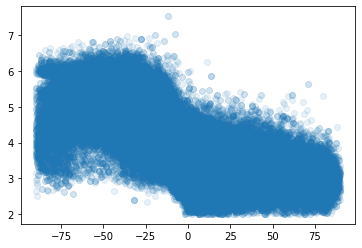

In [7]:
plt.scatter(data_dec, data_eng, alpha = 0.1)
plt.title("IceCube data")
plt.show()

plt.scatter(fake_data_dec, fake_data_eng, alpha = 0.1)
plt.title("fake IceCube data")

In [3]:
plt.scatter(data_dec, data_sigmas)
plt.show()
plt.title("IceCube data")
plt.show()
plt.scatter(fake_data_dec, fake_data_sigmas)
plt.title("Fake IceCube data")

NameError: name 'plt' is not defined

In [13]:
np.savez("./processed_data/output_icecube_data_fake.npz",
         data_sigmas = fake_data_sigmas,
         data_ra= fake_data_ra,
         data_dec= fake_data_dec,
         data_eng = fake_data_eng)
         